## 스타벅스 이벤트 관련 고객 설문 데이터

- 스타벅스 고객들의 이벤트 관련 설문에 응답한 데이터의 일부입니다.


- 해당 데이터에서 고객들이 이벤트에 대한 응답을 어떻게 하는지, 찾고 고객 프로모션 개선방안에 대한 인사이트를 찾습니다.

### 0. Data Description

1. Profile table

> profile 데이터는 설문에 참여한 스타벅스 회원에 관련된 정보가 담겨 있습니다.


2. transcript

> 이벤트에 참여한 실제 유저들의 응답이 기록되어 있습니다.


3. portfoilo

> 이벤트를 운영했던 내역에 관한 정보가 담겨 있습니다.

### 1. 라이브러리 및 데이터 로드

- 분석에 필요한 데이터와, 라이브러리를 불러옵니다.

In [137]:
# 데이터 분석 필수 라이브러리 4종 세트 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [138]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [176]:
# Starbucks Customer Data 폴더안에 있는 데이터 3개를 불러오기
base_path = '/content/drive/MyDrive/Colab Notebooks/project/Starbucks Customer Data/'
transcript = pd.read_csv(base_path + 'transcript.csv').drop(columns=['Unnamed: 0'])
profile = pd.read_csv(base_path + 'profile.csv').drop(columns=['Unnamed: 0']) 
portfolio = pd.read_csv(base_path + 'portfolio.csv').drop(columns=['Unnamed: 0']) #Unnamed column을 삭제해줌.

### 2. 데이터 전처리

- 결측치가 존재하는 데이터를 찾아서, 결측치를 처리해줍니다.

In [6]:
# 각 데이터에 결측치가 있는지 확인합니다.
print(transcript.info())
print(profile.info()) #profile.csv 파일에 null value들이 존재하는 것을 확인할 수 있음.
print(portfolio.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   C

In [144]:
# 결측치를 포함하는 데이터들은 어떤 데이터들인지 확인합니다.
nulls = profile[profile.isnull().any(axis=1)]
nulls.id.unique()

array(['68be06ca386d4c31939f3a4f0e3dd783',
       '38fe809add3b4fcf9315a9694bb96ff5',
       'a03223e636434f42ac4c3df47e8bac43', ...,
       'ca45ee1883624304bac1e4c8a114f045',
       'a9a20fa8b5504360beb4e7c8712f8306',
       'c02b10e8752c4d8e9b73f918558531f7'], dtype=object)

In [145]:
# 결측치를 처리해줍니다. # 평균과 같은 통계량으로 채워주거나, 버립니다.
profile = profile.dropna()
profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               14825 non-null  int64  
 2   id                14825 non-null  object 
 3   became_member_on  14825 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 694.9+ KB


### 3. profile 데이터 분석

- 설문에 참여한 사람 중, 정상적인 데이터로 판단된 데이터에 대한 분석을 수행합니다.


- 각 column마다 원하는 통계량을 찾은 뒤, 해당 통계량을 멋지게 시각화해 줄 plot을 seaborn에서 가져와 구현합니다.

In [146]:
# profile의 became_member_on 데이터를 시간 정보로 변환해줍니다.
profile.became_member_on = pd.to_datetime(profile.became_member_on.astype(str), format='%Y%m%d')
profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            14825 non-null  object        
 1   age               14825 non-null  int64         
 2   id                14825 non-null  object        
 3   became_member_on  14825 non-null  datetime64[ns]
 4   income            14825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 694.9+ KB


#### 성별에 관한 분석

In [147]:
total_num = len(profile)
male_num = len(profile.loc[profile.gender == 'M'])
female_num = len(profile.loc[profile.gender == 'F'])
other_num = len(profile.loc[profile.gender == 'O'])
print('Gender Ratio')
print(f'Male   : {round(male_num/total_num, 2)}')
print(f'Female : {round(female_num/total_num, 2)}')
print(f'Other  : {round(other_num/total_num, 2)}')
#이벤트에 참여한 성별 비율
#남성의 참여 비율이 가장 높은 것을 확인할 수 있음.

Gender Ratio
Male   : 0.57
Female : 0.41
Other  : 0.01


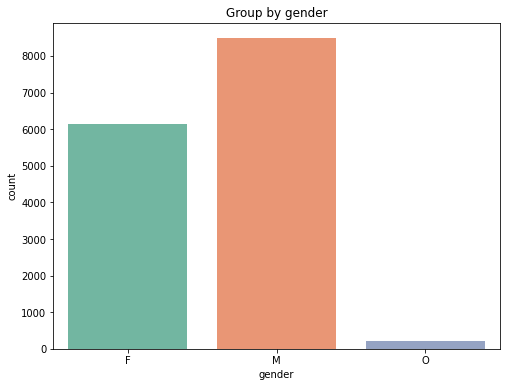

In [148]:
plt.figure(figsize=(8,6))
plt.title('Group by gender')
sns.countplot(data=profile, x='gender', palette='Set2')
plt.show() #이벤트에 참여한 인원을 성별로 분류하여 그래프로 나타냄.

In [149]:
male_income = profile.loc[profile.gender == 'M'].income.mean()
female_income = profile.loc[profile.gender == 'F'].income.mean()
other_income = profile.loc[profile.gender == 'O'].income.mean()

print('Average incom grouped by gender')
print(f'Male   : {round(male_income,2)}')
print(f'Female : {round(female_income,2)}')
print(f'Other  : {round(other_income,2)}')
#평균적으로 여성 이벤트 참가자의 수입이 가장 높은 것을 확인할 수 있음. 

Average incom grouped by gender
Male   : 61194.6
Female : 71306.41
Other  : 63287.74


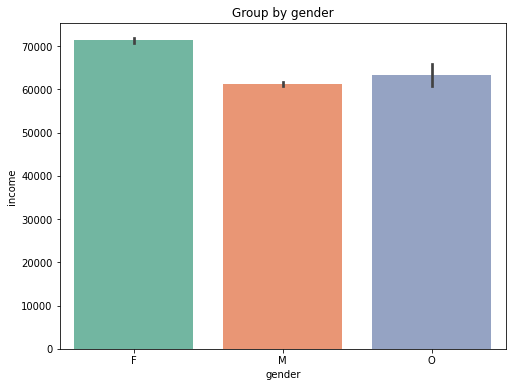

In [150]:
plt.figure(figsize=(8,6))
plt.title('Group by gender')
sns.barplot(data=profile, x='gender', y='income', palette='Set2')
plt.show()#위의 결과를 그래프로 나타내면 이와 같다. 

#### 나이에 대한 분석

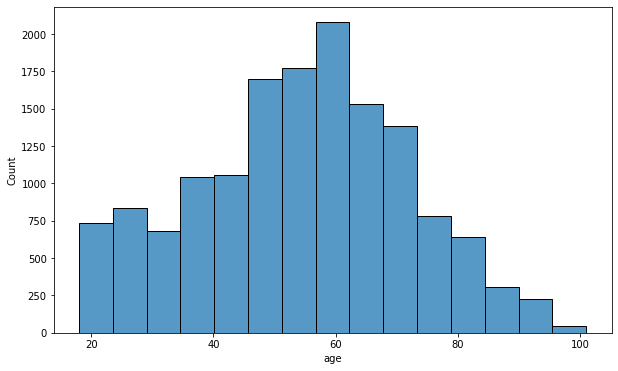

In [151]:
plt.figure(figsize=(10,6))
sns.histplot(data=profile, x='age', bins=15)
plt.show()#그래프를 통해 볼 수 있듯이, 이벤트에 참여한 인원 중 60대가 가장 많은 것으로 확인 된다.

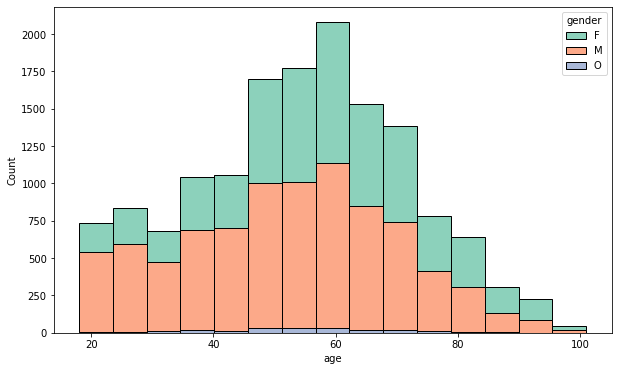

In [152]:
plt.figure(figsize=(10,6))
sns.histplot(data=profile, x='age',hue='gender', bins=15, multiple='stack',palette='Set2')
plt.show()
#성별을 나누어 보아도 모든 성별에서 60대의 이벤트 참여율이 가장 높은 것으로 나타난다.
#다만 20~40대의 경우 남성의 참여 인원이 다른 성별에 비해 많은 것이 확인된다. 

#### 회원이 된 날짜에 대한 분석

In [153]:
profile['join_year'] = profile.became_member_on.dt.year
profile['join_month'] = profile.became_member_on.dt.month
profile

,gender,age,id,became_member_on,income,join_year,join_month
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,2017,5
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,2018,4
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,2018,2
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,2017,11
...,...,...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0,2018,6
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0,2018,7
16997,M,49,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0,2017,1
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0,2016,3


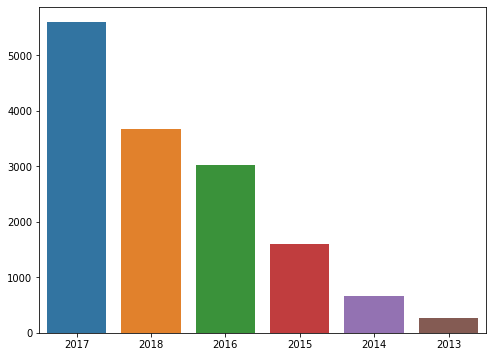

In [154]:
plt.figure(figsize=(8,6))
x = profile.join_year.value_counts().index
y = profile.join_year.value_counts().values
sns.barplot(x=x, y=y, order=x)
plt.show() #2017년에 가장 많이 가입한 것을 확인할 수 있다. 

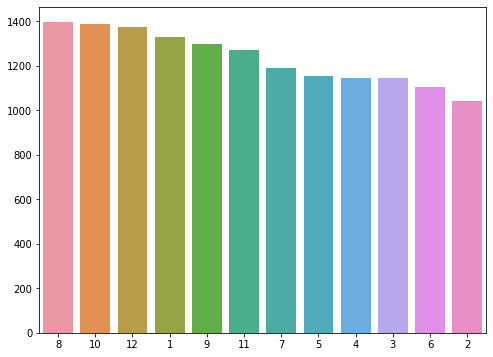

In [155]:
plt.figure(figsize=(8,6))
x = profile.join_month.value_counts().index
y = profile.join_month.value_counts().values
sns.barplot(x=x, y=y, order=x)
#sns.countplot(data=profile, x='join_month', palette='Set2')
plt.show() 
#8월~12월, 1월까지의 기간에 가입한 인원이 많은 것을 확인할 수 있다.
# 해당 월들에 연휴 기간이 많기 때문이 아닌가 추측된다. 

#### 수입에 대한 분석

In [156]:
print('Average Income') #평균 수입
print(f'{round(profile.income.mean(), 2)}')

Average Income
65404.99


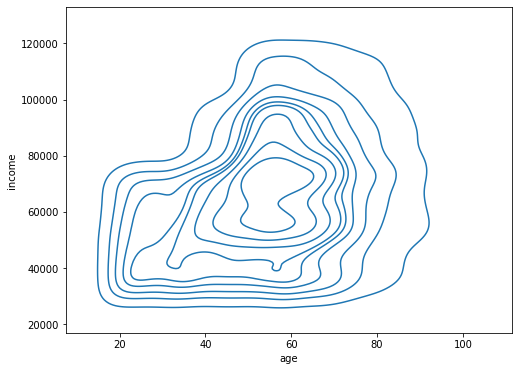

In [157]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=profile,x='age', y='income', palette='Set2')
plt.show()
#kdeplot을 사용해 나이별 수입 밀도를 분석해 보면,  
#60대 부근 연령대에서 계산한 평균 수입 쪽으로 인원이 밀집되어 있는 것을 확인할 수 있다. 
#이는 위에서 확인했듯이 60대 참여자의 수가 가장 많기 때문에 발생한 현상이다.

In [158]:
profile['age_category'] = profile.age.apply(lambda x : (x //10)*10)
profile['age_category'] 
#나이를 구간 별로 나누어 수익을 비교해 보고자 한다.(10년 기준을 자른다.)

1        50
3        70
5        60
8        60
12       50
         ..
16995    40
16996    60
16997    40
16998    80
16999    60
Name: age_category, Length: 14825, dtype: int64

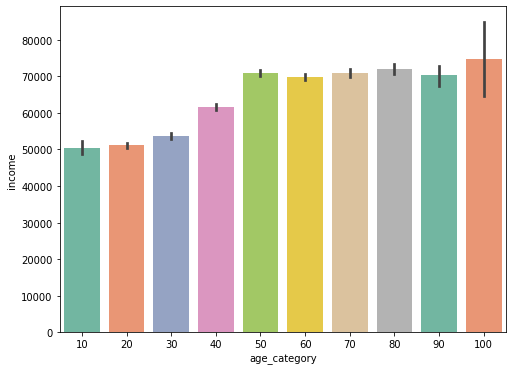

In [159]:
plt.figure(figsize=(8,6))
sns.barplot(data=profile, x='age_category', y='income', palette='Set2')
plt.show()
#전반적으로 연령이 올라갈 수록 평균 수입이 증가하는 것을 확인할 수 있다. 

#### profile 데이터에 대한 상관관계 분석

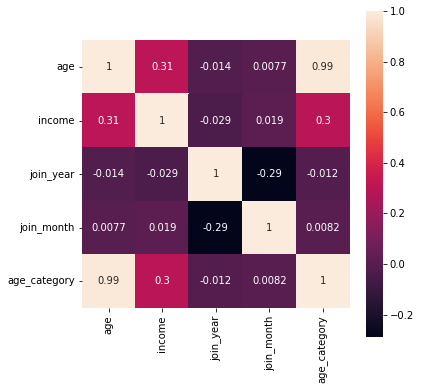

In [160]:
plt.figure(figsize=(6,6))
sns.heatmap(data=profile.corr(), square=True, annot=True)
plt.show()
#각 데이터끼리 유의미한 상관관계를 나타내는 부분은 나이-수입 관계 정도로 보인다. 
#나이가 많을 수록 평균 수입이 올라간다. 

### 4. transcript에 대한 분석

- 각 column마다 원하는 통계량을 찾은 뒤, 해당 통계량을 멋지게 시각화해 줄 plot을 seaborn에서 가져와 구현합니다.


- `person`과 `values` column은 분석 대상에서 제외합니다.


> values에 대한 패턴이 궁금하다면, 아래 코드를 참고해보세요 ! (배우지 않은 내용이 있어, 어려울 수 있습니다)

In [161]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


#### event에 대한 분석

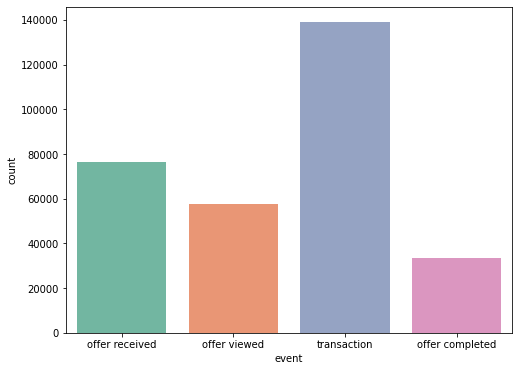

In [162]:
plt.figure(figsize=(8,6))
sns.countplot(data=transcript, x='event', palette='Set2')
plt.show()
#대부분의 고객이 이벤트에 참여한 후 결제까지 완료한 것을 확인할 수 있다. 

In [163]:
pd.pivot_table(data=transcript, index='event', values='time')
#각 단계와 그에 따른 시간에는 큰 상관관계가 없어 보인다. 

,time
event,
offer completed,401.052801
offer received,332.579519
offer viewed,354.290515
transaction,381.584334


In [164]:
total = len(transcript.event)
transaction = len(transcript.loc[transcript.event == 'transaction'])
transaction_time = transcript.loc[transcript.event == 'transaction'].time.mean()

print(f'Transaction Ratio : {round(transaction/total,2)*100}%')
# 45%에 해당하는 인원이 이벤트에 참여한 후 결제까지 완료한 것을 확인할 수 있다.
print(f'Transaction Time  : {round(transaction_time,2)}')
# 결제까지 완료한 인원이 이벤트를 완료한데 까지 걸린 평균 시간 또한 구한다. 

Transaction Ratio : 45.0%
Transaction Time  : 381.58


#### time에 대한 분석

In [165]:
temp = sorted(transcript.time.value_counts()[:6].index)
print(temp)
for i in range(len(temp)-1):
  print(temp[i+1] - temp[i], end=" ")

[0, 168, 336, 408, 504, 576]
168 168 72 96 72 

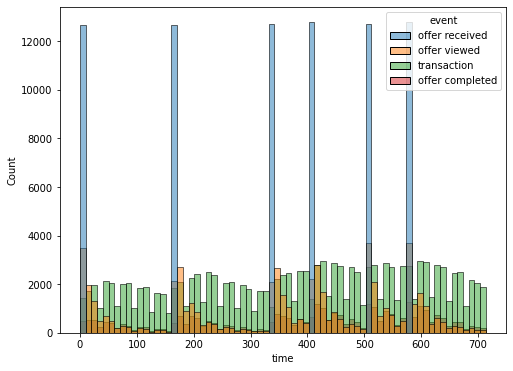

In [166]:
plt.figure(figsize=(8,6))
sns.histplot(data=transcript, x='time', hue='event')
plt.show()

In [168]:
temp_df = transcript.loc[transcript.time.isin(temp), :]
temp_df

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
262132,08eb126ad33f447ca3ad076482445c05,transaction,{'amount': 16.93},576
262133,1b4df4b48bf64727a4c445909aea1251,offer viewed,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},576
262134,ff737c250d2343729ade04c4f6eb1001,transaction,{'amount': 4.78},576
262135,400d0536e8794cbb855b0d882d67cbda,offer viewed,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},576


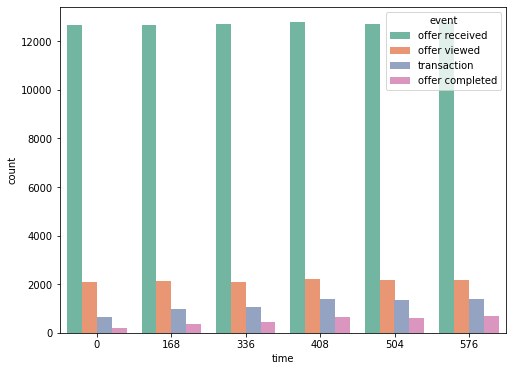

In [169]:
plt.figure(figsize=(8,6))
#sns.countplot(data=temp_df, x='event',palette='Set2', hue='time')
sns.countplot(data=temp_df, x='time',palette='Set2', hue='event')
plt.show()

#### (Advanced, optional) value에 대한 분석 

In [177]:
# str로 되어있는 데이터를 dictionary로 변환
transcript.value = transcript.value.apply(lambda x:eval(x))
transcript.value

0         {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1         {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2         {'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3         {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4         {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}
                                ...                       
306529                      {'amount': 1.5899999999999999}
306530                                    {'amount': 9.53}
306531                                    {'amount': 3.61}
306532                      {'amount': 3.5300000000000002}
306533                                    {'amount': 4.05}
Name: value, Length: 306534, dtype: object

In [191]:
list(transcript.value[0].keys())[0]

'offer id'

In [196]:
# event에 따른 value의 차이 확인
transcript["value_key"] = transcript.value.apply(lambda x:list(x.keys())[0])
transcript["value_value"] = transcript.value.apply(lambda x:list(x.values())[0])
transcript.value_value

0         9b98b8c7a33c4b65b9aebfe6a799e6d9
1         0b1e1539f2cc45b7b9fa7c272da2e1d7
2         2906b810c7d4411798c6938adc9daaa5
3         fafdcd668e3743c1bb461111dcafc2a4
4         4d5c57ea9a6940dd891ad53e9dbe8da0
                        ...               
306529                                1.59
306530                                9.53
306531                                3.61
306532                                3.53
306533                                4.05
Name: value_value, Length: 306534, dtype: object

In [201]:
transcript.value_value.head(30)

0     9b98b8c7a33c4b65b9aebfe6a799e6d9
1     0b1e1539f2cc45b7b9fa7c272da2e1d7
2     2906b810c7d4411798c6938adc9daaa5
3     fafdcd668e3743c1bb461111dcafc2a4
4     4d5c57ea9a6940dd891ad53e9dbe8da0
5     f19421c1d4aa40978ebb69ca19b0e20d
6     2298d6c36e964ae4a3e7e9706d1fb8c2
7     3f207df678b143eea3cee63160fa8bed
8     0b1e1539f2cc45b7b9fa7c272da2e1d7
9     0b1e1539f2cc45b7b9fa7c272da2e1d7
10    0b1e1539f2cc45b7b9fa7c272da2e1d7
11    0b1e1539f2cc45b7b9fa7c272da2e1d7
12    ae264e3637204a6fb9bb56bc8210ddfd
13    3f207df678b143eea3cee63160fa8bed
14    0b1e1539f2cc45b7b9fa7c272da2e1d7
15    fafdcd668e3743c1bb461111dcafc2a4
16    0b1e1539f2cc45b7b9fa7c272da2e1d7
17    2906b810c7d4411798c6938adc9daaa5
18    9b98b8c7a33c4b65b9aebfe6a799e6d9
19    ae264e3637204a6fb9bb56bc8210ddfd
20    2906b810c7d4411798c6938adc9daaa5
21    9b98b8c7a33c4b65b9aebfe6a799e6d9
22    4d5c57ea9a6940dd891ad53e9dbe8da0
23    2906b810c7d4411798c6938adc9daaa5
24    2298d6c36e964ae4a3e7e9706d1fb8c2
25    2906b810c7d4411798c

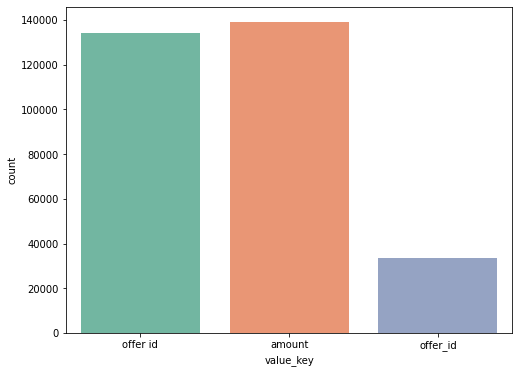

In [241]:
plt.figure(figsize=(8, 6))
sns.countplot(data=transcript, x="value_key", palette='Set2')
plt.show()
#amount는 transaction 단계까지 마친 사람들

In [240]:
print(len(transcript.loc[transcript.value_key == 'amount']))
print(len(transcript.loc[transcript.event == 'transaction']))
# 둘의 숫자가 같은 것을 통해 위의 사실을 확인할 수 있음

138953
138953


In [197]:
transcript.value_key.value_counts()

amount      138953
offer id    134002
offer_id     33579
Name: value_key, dtype: int64

In [108]:
transcript.value_value.value_counts()

fafdcd668e3743c1bb461111dcafc2a4    20241
2298d6c36e964ae4a3e7e9706d1fb8c2    20139
f19421c1d4aa40978ebb69ca19b0e20d    19131
4d5c57ea9a6940dd891ad53e9dbe8da0    18222
ae264e3637204a6fb9bb56bc8210ddfd    18062
                                    ...  
635.06                                  1
42.51                                   1
124.03                                  1
40.49                                   1
476.33                                  1
Name: value_value, Length: 5113, dtype: int64

In [221]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [226]:
portfolio[['id', 'offer_type']]
#각 이벤트에 따른 보상

,id,offer_type
0,ae264e3637204a6fb9bb56bc8210ddfd,bogo
1,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo
2,3f207df678b143eea3cee63160fa8bed,informational
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount
5,2298d6c36e964ae4a3e7e9706d1fb8c2,discount
6,fafdcd668e3743c1bb461111dcafc2a4,discount
7,5a8bc65990b245e5a138643cd4eb9837,informational
8,f19421c1d4aa40978ebb69ca19b0e20d,bogo
9,2906b810c7d4411798c6938adc9daaa5,discount


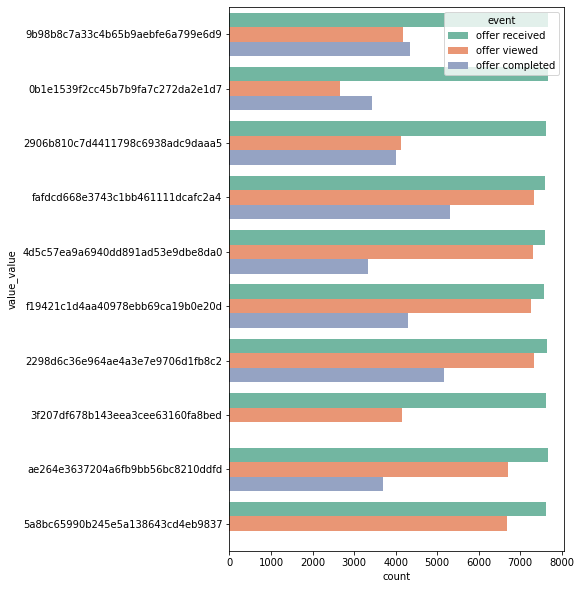

In [242]:
temp = transcript.loc[transcript.value_key != "amount"]
plt.figure(figsize=(6,10))
sns.countplot(data=temp, y='value_value',hue='event', palette='Set2')
plt.show()
#transaction을 제외한 나머지 event들을 대상으로 한 그래프
#전반적으로 할인 이벤트를 확인한 사람들이 많다.
#이벤트를 완료한 인원도 할인 이벤트들이 제일 많다. 

# 분석 결과

데이터들을 전반적으로 분석한 결과,
60대 남성의 참여율이 
가장 높은 것으로 나타났다.

가입 인원은 8-12월, 그리고 1월에 가장 많았으며
이는 해당 월들에 연휴가 많기 때문으로 추정된다.

고객들이 가장 많이 참여하는 이벤트는 할인 이벤트이다.

이를 통해 연휴 기간에 60대 남성을 대상으로 한 할인 이벤트를 진행하면 높은 참여율을 이끌어 낼 것으로 추정된다. 